In [1]:
import pandas as pd 
import seaborn as sns
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
order = pd.read_excel('Dataset.xlsx')
returned = pd.read_excel('Dataset.xlsx', sheet_name ="Return")

In [3]:
merged = pd.merge(order, returned, on='Order ID', how='left')
merged['Returned'].fillna("No", inplace=True)
clean = merged[merged['Returned']=="No"]
clean

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,No
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,No
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,No
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,No
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,No
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,No
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,No
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,No


In [4]:
lastdate = datetime.datetime(2017,12,31)
RFM = clean.groupby(['Customer ID']).agg({
                    'Order Date': lambda x: (lastdate - x.max()).days,
                    'Order ID': 'nunique',
                    'Sales': 'sum' }).reset_index()
print(RFM)

    Customer ID  Order Date  Order ID     Sales
0      AA-10315         185         5  5563.560
1      AA-10375          20         9  1056.390
2      AA-10480         260         4  1790.512
3      AA-10645         483         5  5073.975
4      AB-10015         416         3   886.156
..          ...         ...       ...       ...
786    XP-21865          83         9  2110.726
787    YC-21895           5         4  5438.650
788    YS-21880          10         8  6720.444
789    ZC-21910          55        12  7892.998
790    ZD-21925         203         4  1249.184

[791 rows x 4 columns]


In [5]:
RFM.rename(columns={'Order Date': 'Recency',
                   'Order ID':'Frequency',
                   'Sales':'MonetaryValue'}, inplace=True)
print(RFM)

    Customer ID  Recency  Frequency  MonetaryValue
0      AA-10315      185          5       5563.560
1      AA-10375       20          9       1056.390
2      AA-10480      260          4       1790.512
3      AA-10645      483          5       5073.975
4      AB-10015      416          3        886.156
..          ...      ...        ...            ...
786    XP-21865       83          9       2110.726
787    YC-21895        5          4       5438.650
788    YS-21880       10          8       6720.444
789    ZC-21910       55         12       7892.998
790    ZD-21925      203          4       1249.184

[791 rows x 4 columns]


In [6]:
RFM['r_score']=pd.qcut(RFM['Recency'],q=5,labels=range(5,0,-1))
RFM['f_score']=pd.qcut(RFM['Frequency'],q=5,labels=range(1,6))
RFM['m_score']=pd.qcut(RFM['MonetaryValue'],q=5,labels=range(1,6))
RFM['RFM Score'] = RFM.apply(lambda x: str(x['r_score'])+str(x['f_score'])+str(x['m_score']), axis=1)
RFM['RFM Score']=RFM['RFM Score'].astype(int)
print(RFM)



    Customer ID  Recency  Frequency  MonetaryValue r_score f_score m_score  \
0      AA-10315      185          5       5563.560       2       2       5   
1      AA-10375       20          9       1056.390       5       5       2   
2      AA-10480      260          4       1790.512       2       1       3   
3      AA-10645      483          5       5073.975       1       2       5   
4      AB-10015      416          3        886.156       1       1       2   
..          ...      ...        ...            ...     ...     ...     ...   
786    XP-21865       83          9       2110.726       3       5       3   
787    YC-21895        5          4       5438.650       5       1       5   
788    YS-21880       10          8       6720.444       5       4       5   
789    ZC-21910       55         12       7892.998       4       5       5   
790    ZD-21925      203          4       1249.184       2       1       2   

     RFM Score  
0          225  
1          552  
2          2

In [7]:
segment = pd.read_excel('Dataset.xlsx', sheet_name ="Segmentation")
segment

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [8]:
new_segment = segment.assign(RFM_Score=segment['RFM Score'].str.split(',')).explode('RFM_Score').reset_index(drop=True)
new_segment['RFM_Score']=new_segment['RFM_Score'].astype(int)
segmentation = new_segment[['Segment','RFM_Score']]
print(segmentation)

            Segment  RFM_Score
0         Champions        555
1         Champions        554
2         Champions        544
3         Champions        545
4         Champions        454
..              ...        ...
120  Lost customers        112
121  Lost customers        121
122  Lost customers        131
123  Lost customers        141
124  Lost customers        151

[125 rows x 2 columns]


In [9]:
joined=RFM.merge(segmentation,how='left',left_on='RFM Score', right_on='RFM_Score')
print(joined)

    Customer ID  Recency  Frequency  MonetaryValue r_score f_score m_score  \
0      AA-10315      185          5       5563.560       2       2       5   
1      AA-10375       20          9       1056.390       5       5       2   
2      AA-10480      260          4       1790.512       2       1       3   
3      AA-10645      483          5       5073.975       1       2       5   
4      AB-10015      416          3        886.156       1       1       2   
..          ...      ...        ...            ...     ...     ...     ...   
786    XP-21865       83          9       2110.726       3       5       3   
787    YC-21895        5          4       5438.650       5       1       5   
788    YS-21880       10          8       6720.444       5       4       5   
789    ZC-21910       55         12       7892.998       4       5       5   
790    ZD-21925      203          4       1249.184       2       1       2   

     RFM Score                Segment  RFM_Score  
0          2

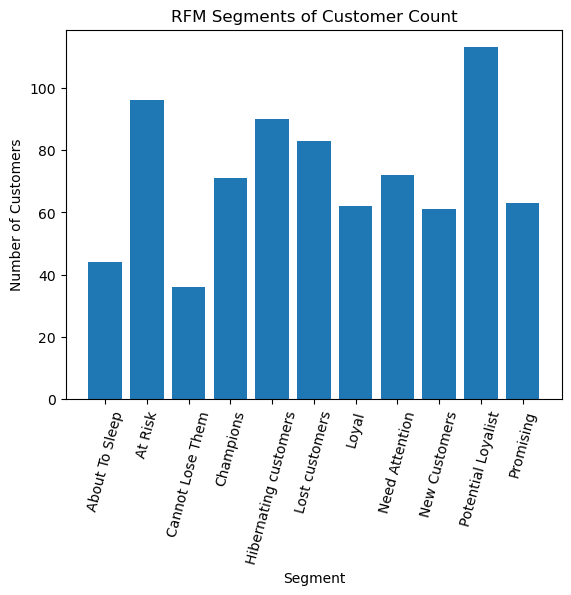

In [10]:
segment_counts = joined.groupby('Segment')['Customer ID'].count()
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.title('RFM Segments of Customer Count')
plt.xticks(rotation=75)
plt.show()

Text(0.5, 1.0, 'Percentage of customer segmentation')

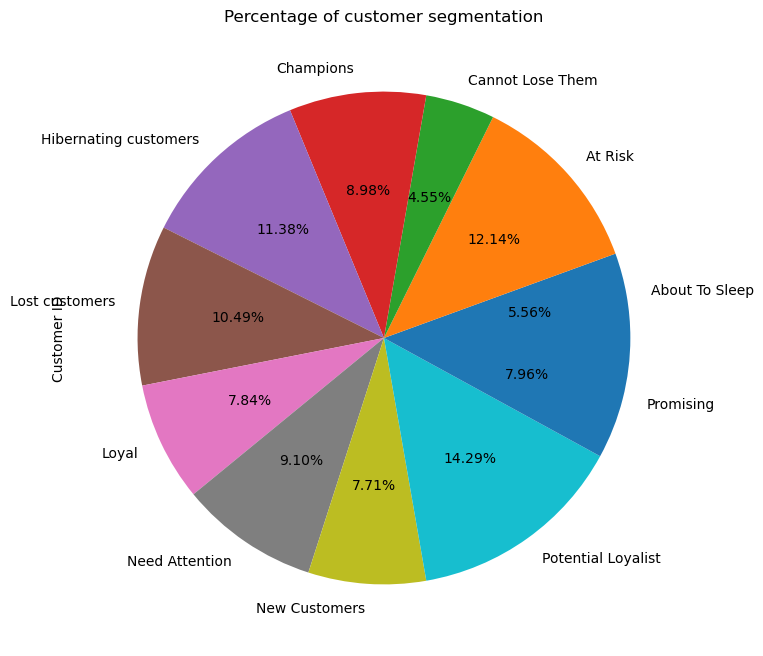

In [11]:
joined.groupby('Segment')['Customer ID'].count().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Percentage of customer segmentation')

- Khách hàng Champions và Loyal chiếm khoảng 15% 
-> cần có nhiều khách VIP hơn(target 20%)

Text(0.5, 1.0, 'Customer segmentation by Total Sales')

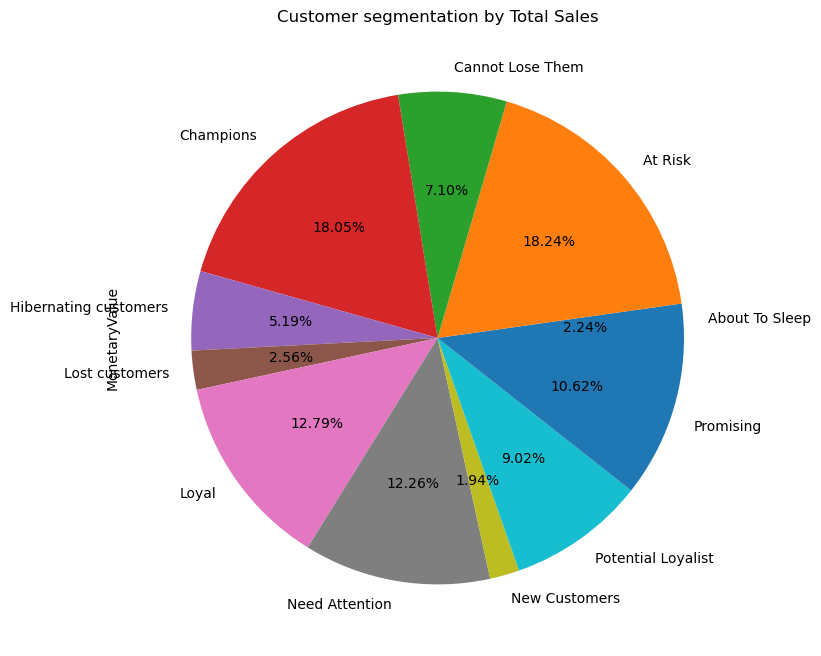

In [13]:
joined.groupby('Segment').MonetaryValue.sum().plot.pie(autopct = '%.2f%%', figsize = (8, 8))
plt.title('Customer segmentation by Total Sales')

- Nhóm At risk là nhóm đóng góp vào doanh thu nhiều nhất, ngang ngửa với Champions và hơn gấp rưỡi nhóm Loyal
- Need attention cũng là 1 nhóm đáng chú ý, đóng góp ngang ngửa nhóm Loyal

Text(0.5, 1.0, 'Total sales by customer group')

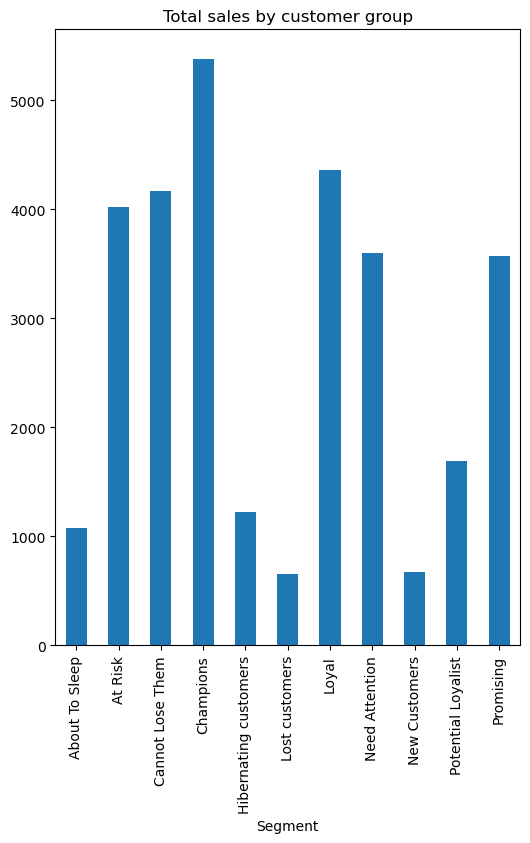

In [15]:
fig=joined.groupby('Segment').MonetaryValue.mean().plot.bar(figsize = (6, 8))
plt.title('Total sales by customer group')

- nhóm Champions và Loyal tiêu nhiều tiền nhất (cái này dĩ nhiên)
- đáng chú ý là nhóm Cannot lose them,At risk,Need attention và Promising đóng góp khá nhiều vào doanh thu

Text(0.5, 1.0, 'Frequency by customer segmentation')

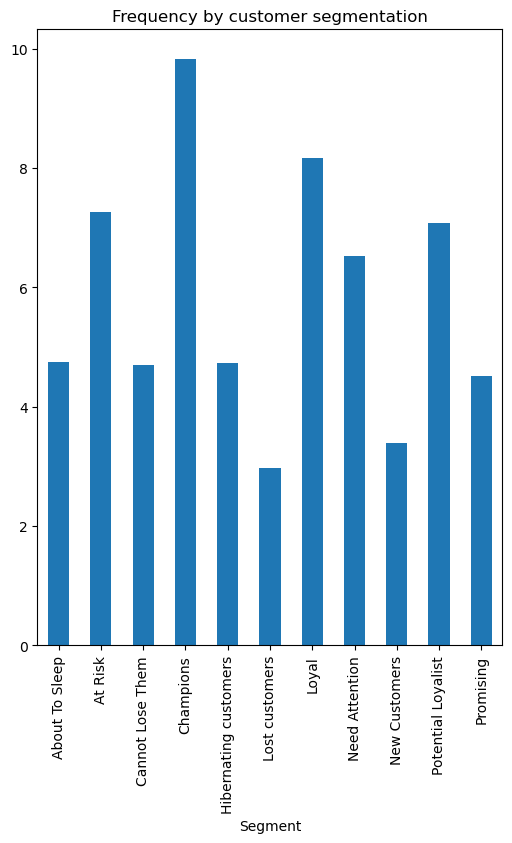

In [17]:
joined.groupby('Segment').Frequency.mean().plot.bar(figsize = (6, 8))
plt.title('Frequency by customer segmentation')

- nhóm Cannot Lose them, At risk và Need attention cũng đặt rất nhiều đơn

Text(0.5, 1.0, 'Recency by customer segmentation')

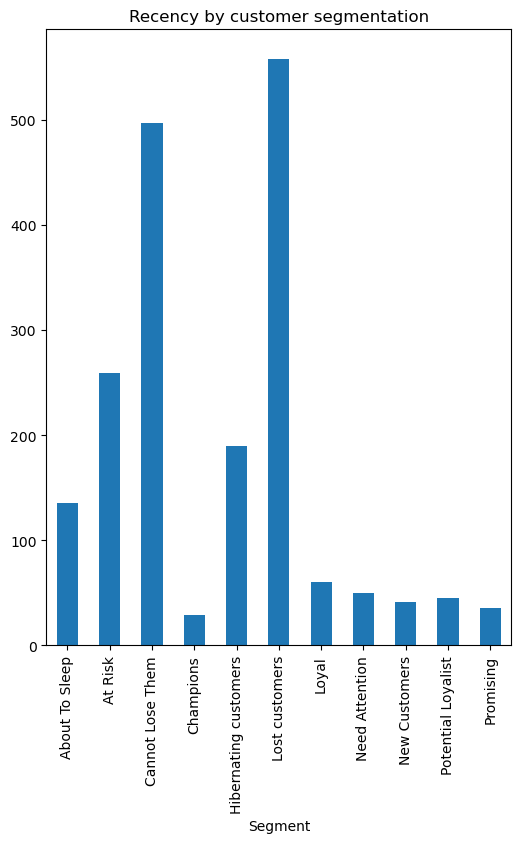

In [19]:
joined.groupby('Segment').Recency.mean().plot.bar(figsize = (6, 8))
plt.title('Recency by customer segmentation')

- nhóm Cannot Lose them và At risk mua hàng quay trở lại rất thường xuyên. Đây chắc chắn là 2 nhóm nên đc take care kĩ hơn trong đợt marketing lần này
- Ngoài ra, nhóm Promising và New Customers vốn là những nhóm nên quay lại thường xuyên, nhưng ở đây lại ít quay lại nhất
=> sản phẩm chưa đủ hấp dẫn đối với những nhóm khách hàng này để thuyết phục họ quay lại

## Recommendations:
- 1. Gia tăng số lượng khách hàng VIP(Champions, Loyal) để đảm bảo mục tiêu 20% khách hàng là VIP mang lại 80% doanh số. 
-> hiện tại còn quá ít, chiếm 15% tổng số khách hàng nhưng chỉ đóng góp đc hơn 40% doanh thu.

- 2. Nhóm At risk và Cannot Lose them chiếm 1/4 số khách hàng, và đóng góp hơn 40% vào tổng doanh số, thường xuyên quay trở lại, số lượng đơn cũng nhiều
-> **Chiến dịch marketing cần focus vào nhóm này**
-> có thể send nhiều mã giảm giá, gửi email/ call hỏi thăm, giới thiệu các sản phẩm, chiến dịch mới. 
-> nhóm này quay lại nhiều, nghĩa là có quan tâm đến các sản phẩm của store -> cần take care nhiều hơn để giữ chân khách



In [22]:
# Trong mô hình RFM, mức độ quan trọng của từng chỉ số tương ứng với thứ tự
#=> R quan trọng nhất